# Heart Dataset

   We will use SVM Classification , Decision Trees Classification and Random Forest Classification

# Import Library

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings("ignore")

# Read Dataset

In [2]:
df = pd.read_csv("heart.csv")

# Data Preparation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1


# Visulazations

<AxesSubplot:>

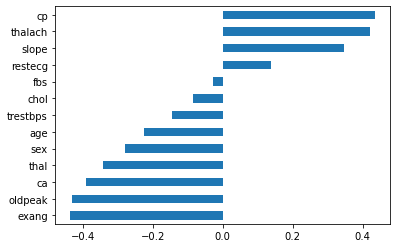

In [11]:
df.corr()['target'].drop('target').sort_values().plot.barh()

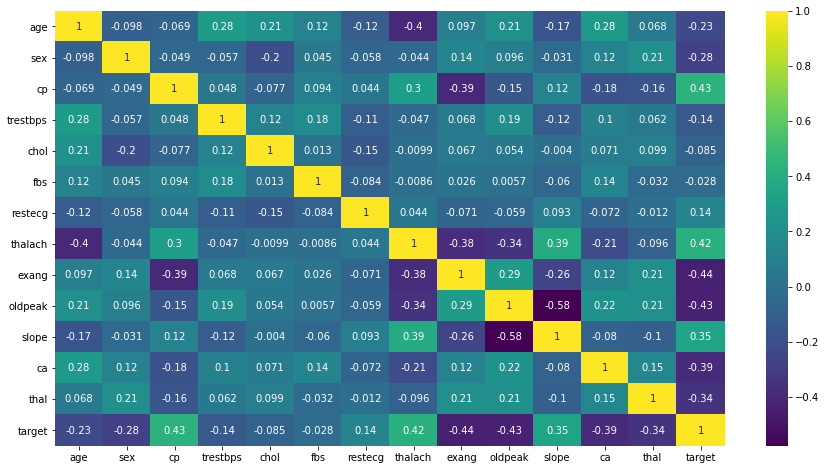

In [14]:
plt.figure(figsize= (15, 8))
sns.heatmap(df.corr(), annot = True, cmap = "viridis")
plt.show()

In [15]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

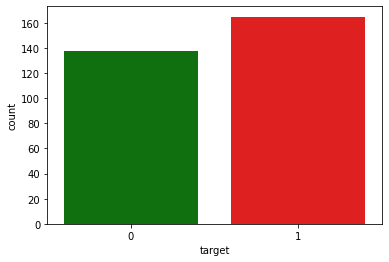

In [18]:
colors = ["green", "red"]
sns.countplot(df.target, palette= colors)
plt.show()

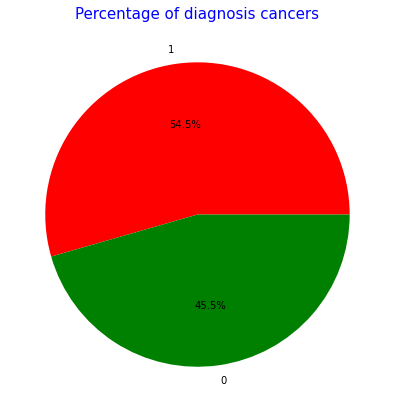

In [31]:
labels = df.target.value_counts().index
explode = [0, 0]
sizes = df.target.value_counts().values

# visual
plt.figure(figsize= (7, 7))
plt.pie(sizes, explode= explode, labels= labels, colors= ["red", "green"], autopct = "%1.1f%%")
plt.title("Percentage of diagnosis cancers", color = "blue", fontsize = 15)
plt.show()

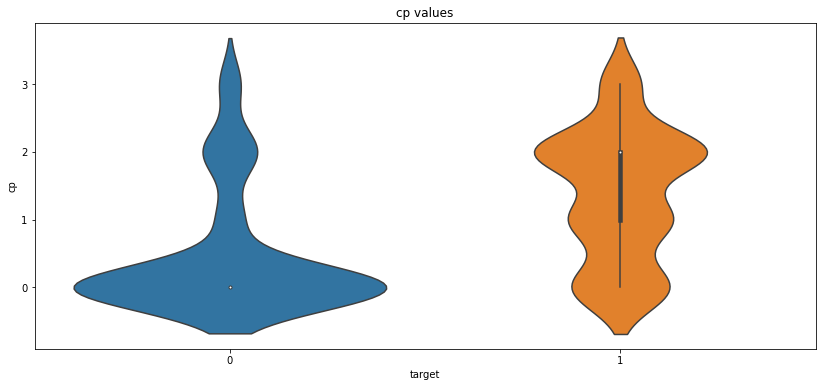

In [36]:
plt.figure(figsize= (14, 6))
sns.violinplot(x= df["target"], y= df["cp"])
plt.title('cp values')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

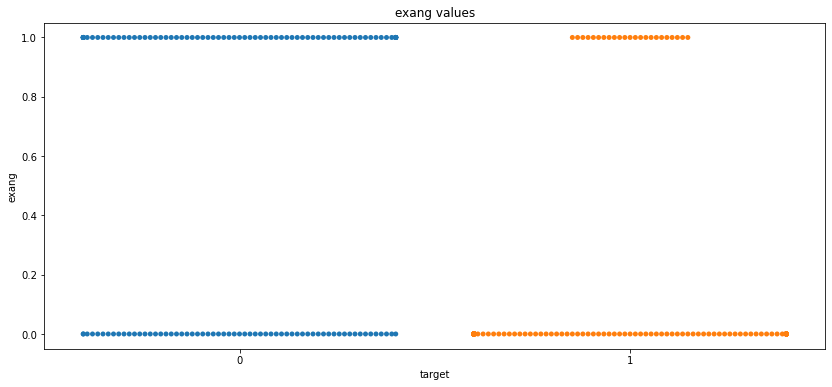

In [37]:
plt.figure(figsize= (14, 6))
sns.swarmplot(x= df["target"], y= df["exang"])
plt.title('exang values')
plt.show

# Statistical Analysis

# Determine Dependent and Independent Variables

In [49]:
X = df.drop(("target"), axis= 1)
y = df["target"]

# 1. SVM Classification

## Train - Test Split

In [396]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 99)

In [397]:
print("x_train: {}\nx_test: {}\ny_train: {}\ny_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

x_train: (212, 13)
x_test: (91, 13)
y_train: (212,)
y_test: (91,)


# Scaling the Data

In [398]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [399]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Model Fitting and Compare Actual and Predicted Labels

In [400]:
from sklearn.svm import SVC


In [401]:
svr_model = SVC()

In [402]:
svr_model.fit(X_train, y_train)

SVC()

In [403]:
y_pred = svr_model.predict(X_test)
y_train_pred = svr_model.predict(X_train)


## Error Metrics

In [404]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,confusion_matrix, classification_report

## Evaluate Model

In [405]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       106
           1       0.85      0.90      0.87       106

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.87      0.87      0.87       212



In [406]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.90      0.90      0.90        59

    accuracy                           0.87        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.87      0.87        91



In [407]:
svc_scores = {"svc_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred,average = "weighted"),
    "recall_score" : recall_score(y_train, y_train_pred,average = "weighted"),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "svc_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred,average = "weighted"),
    "recall_score" : recall_score(y_test, y_pred, average = "weighted"),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
svc =pd.DataFrame(svc_scores)

In [408]:
svc

,svc_train,svc_test
accuracy,0.87,0.87
precision_score,0.87,0.87
recall_score,0.87,0.87
f1_score,0.87,0.87


# SVC GridsearchCV 

In [409]:
from sklearn.model_selection import GridSearchCV

In [410]:
param_grid = {'C':[1, 10, 20, 30,50, 70, 100, 1000],
             'kernel':['linear','rbf','poly','sigmoid'],
            'gamma': [1e-3, 1e-4]}

In [411]:
model = SVC()

In [412]:
svc_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, verbose = 3, cv=5)

In [413]:
svc_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001

[CV 2/5] END ...............C=30, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ...............C=30, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ...............C=30, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=30, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=30, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=30, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=30, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=30, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=30, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=30, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5] END .................C=30, gamma=0.001, kernel=poly; total time=   0.0s
[CV 3/5] END .................C=30, gamma=0.001, kernel=poly; total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END .................C=70, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=70, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=70, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=70, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=70, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 2/5] END ................C=70, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 3/5] END ................C=70, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 4/5] END ................C=70, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 5/5] END ................C=70, gamma=0.0001, kernel=poly; total time=   0.0s
[CV 1/5] END .............C=70, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .............C=70, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .............C=70, gamma=0.0001, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .............C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 70, 100, 1000],
                         'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [414]:
svc_grid_model.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

In [415]:
y_pred_grid = svc_grid_model.predict(X_test)

In [416]:
svc_grid_scores = {"svc_grid_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred,average = "weighted"),
    "recall_score" : recall_score(y_train, y_train_pred,average = "weighted"),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "svc_grid_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred,average = "weighted"),
    "recall_score" : recall_score(y_test, y_pred, average = "weighted"),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
svc_grid =pd.DataFrame(svc_grid_scores)

In [417]:
svc_grid

,svc_grid_train,svc_grid_test
accuracy,0.87,0.87
precision_score,0.87,0.87
recall_score,0.87,0.87
f1_score,0.87,0.87


# 2. Decision Trees Classification

## Train - Test Split

## Model Fitting and Compare Actual and Predicted Labels

In [418]:
from sklearn.tree import DecisionTreeClassifier

In [419]:
dt_model = DecisionTreeClassifier(criterion= "gini", min_samples_split= 2)

In [420]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [421]:
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)

## Error Metrics

In [422]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       106

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [423]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        32
           1       0.86      0.81      0.83        59

    accuracy                           0.79        91
   macro avg       0.77      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



In [424]:
dt_scores = {"dt_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred,average = "weighted"),
    "recall_score" : recall_score(y_train, y_train_pred,average = "weighted"),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "dt_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred,average = "weighted"),
    "recall_score" : recall_score(y_test, y_pred, average = "weighted"),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
dt =pd.DataFrame(dt_scores)

In [425]:
dt

,dt_train,dt_test
accuracy,1.00,0.79
precision_score,1.00,0.80
recall_score,1.00,0.79
f1_score,1.00,0.79


# DT GridsearchCV 

In [426]:
from sklearn.model_selection import GridSearchCV

In [427]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split': [2, 5,10]}

In [428]:
model= DecisionTreeClassifier()

In [429]:
dt_grid_model = GridSearchCV(model, param_grid, verbose = 3, refit= True)

In [430]:
dt_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_depth=4, min_samples_split=2; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_split=2; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_split=2; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_split=2; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_split=2; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_split=10; total time=   0.0s
[CV 2/5] END criterion=gini, max_d

[CV 1/5] END criterion=gini, max_depth=50, min_samples_split=5; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=50, min_samples_split=5; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=50, min_samples_split=5; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=50, min_samples_split=5; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=50, min_samples_split=5; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=50, min_samples_split=10; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=50, min_samples_split=10; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=50, min_samples_split=10; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=50, min_samples_split=10; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=50, min_samples_split=10; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=70, min_samples_split=2; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=70, min_samples_split=2; total time=   0.0s

[CV 3/5] END criterion=entropy, max_depth=6, min_samples_split=5; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_split=5; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_split=5; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_split=10; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_split=10; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_split=10; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_split=10; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_split=10; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_split=2; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_split=2; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_split=2; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_spl

[CV 1/5] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, min_samples_split=5; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_split=5; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_split=5; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_split=5; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_split=5; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, min_samples_split=10; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, min_sam

[CV 5/5] END criterion=entropy, max_depth=90, min_samples_split=10; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=120, min_samples_split=2; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=120, min_samples_split=2; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=120, min_samples_split=2; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=120, min_samples_split=2; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=120, min_samples_split=2; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=120, min_samples_split=5; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=120, min_samples_split=5; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=120, min_samples_split=5; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=120, min_samples_split=5; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=120, min_samples_split=5; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=1

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [431]:
dt_grid_model.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 10}

In [432]:
y_pred_grid = dt_grid_model.predict(X_test)

In [433]:
dt_grid_scores = {"dt_grid_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred,average = "weighted"),
    "recall_score" : recall_score(y_train, y_train_pred,average = "weighted"),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "dt_grid_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred,average = "weighted"),
    "recall_score" : recall_score(y_test, y_pred, average = "weighted"),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
dt_grid =pd.DataFrame(dt_grid_scores)

In [434]:
dt_grid

,dt_grid_train,dt_grid_test
accuracy,1.00,0.79
precision_score,1.00,0.80
recall_score,1.00,0.79
f1_score,1.00,0.79


## Evaluate Model

# 3. Random Forest Classification

## Train - Test Split

## Model Fitting and Compare Actual and Predicted Labels

In [435]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 10, max_features = "auto",random_state= 101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

## Error Metrics

In [436]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       106
           1       0.99      0.99      0.99       106

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [437]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74        32
           1       0.90      0.76      0.83        59

    accuracy                           0.79        91
   macro avg       0.78      0.80      0.78        91
weighted avg       0.82      0.79      0.80        91



## Evaluate Model

In [438]:
rf_scores = {"rf_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred,average = "weighted"),
    "recall_score" : recall_score(y_train, y_train_pred,average = "weighted"),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "rf_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred,average = "weighted"),
    "recall_score" : recall_score(y_test, y_pred, average = "weighted"),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
rf =pd.DataFrame(rf_scores)

In [439]:
rf

,rf_train,rf_test
accuracy,0.99,0.79
precision_score,0.99,0.82
recall_score,0.99,0.79
f1_score,0.99,0.80


# RF GridsearchCV 

In [440]:
from sklearn.model_selection import GridSearchCV

In [449]:
param_grid ={
    'n_estimators': [5,10,30, 50, 100],
    'criterion':['gini','entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [450]:
model= RandomForestClassifier()

In [451]:
rf_grid_model = GridSearchCV(model, param_grid, verbose = 3, cv=10, refit= True)

In [452]:
rf_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 4/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 8/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 9/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 10/10] END criterion=gini, max_features=auto, n_estimators=5; total time=   0.0s
[CV 1/10] END criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/10] E

[CV 9/10] END criterion=gini, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV 10/10] END criterion=gini, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV 1/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 2/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 3/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 4/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 5/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 6/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 7/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 8/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 9/10] END criterion=gini, max_features=log2, n_estimators=5; total time=   0.0s
[CV 10/10] END criterion=gini, max_features=log2, n_estimators=5; total

[CV 5/10] END criterion=entropy, max_features=auto, n_estimators=100; total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, n_estimators=100; total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, n_estimators=100; total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, n_estimators=100; total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=auto, n_estimators=100; total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=auto, n_estimators=100; total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV 6/10] END criterion=entrop

[CV 10/10] END criterion=entropy, max_features=log2, n_estimators=50; total time=   0.0s
[CV 1/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 9/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s
[CV 10/10] END criterion=entropy, max_features=log2, n_estimators=100; total time=   0.0s


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 30, 50, 100]},
             verbose=3)

In [453]:
rf_grid_model.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}

In [454]:
y_pred_grid = rf_grid_model.predict(X_test)

In [455]:
rf_grid_scores = {"rf_grid_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred,average = "weighted"),
    "recall_score" : recall_score(y_train, y_train_pred,average = "weighted"),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "rf_grid_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred,average = "weighted"),
    "recall_score" : recall_score(y_test, y_pred, average = "weighted"),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
rf_grid =pd.DataFrame(rf_grid_scores)

In [456]:
rf_grid

,rf_grid_train,rf_grid_test
accuracy,0.99,0.79
precision_score,0.99,0.82
recall_score,0.99,0.79
f1_score,0.99,0.80
